# PISA Data Exploration
### by Marc Angelo Acebedo

# Preliminary Wrangling

> PISA is a survey of students' skills and knowledge upon the end of their compulsory education, looking at how well-prepared they are for life after school. In the original PISA dataset[TK], 485,490 students in 65 economies took part in this survey.

## Data Setup & Overview

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
plt.style.use('bmh')

In [3]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [4]:
df = pd.read_csv('./data/pisa2012_clean.csv', low_memory = False)
df.sample(5)

,student_id,country_code,gender,math_score,reading_score,science_score,mother_occupation,father_occupation,mother_immigrant,teacher_helpfulness,belonging,acculturation,work_ethic,future_optimism,self_esteem
388820,5292,Portugal,Male,415.4152,359.2531,385.5278,Child care workers,Motor vehicle mechanics and repairers,Yes,NaN,NaN,NaN,7.035714,5.00,NaN
266206,25617,Italy,Male,540.7462,463.4258,517.0086,Building structure cleaners,Building structure cleaners,Yes,7.321429,8.333333,NaN,6.071429,7.00,6.000000
363950,41,Norway,Male,487.7006,479.7855,563.9127,"Vague(a good job, a quiet job, a well paid job...","Vague(a good job, a quiet job, a well paid job...",NaN,7.142857,7.500000,NaN,6.607143,7.25,6.136364
234433,2407,Iceland,Male,460.8272,448.9908,428.7952,Invalid,House builders,NaN,NaN,NaN,NaN,6.666667,10.00,NaN
351044,1536,Montenegro,Male,449.2990,416.1912,417.8851,Shop sales assistants,Police officers,NaN,8.750000,8.055556,NaN,NaN,8.75,6.590909


In [5]:
df.shape

(485490, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 15 columns):
student_id             485490 non-null int64
country_code           485490 non-null object
gender                 485490 non-null object
math_score             485490 non-null float64
reading_score          485490 non-null float64
science_score          485490 non-null float64
mother_occupation      483887 non-null object
father_occupation      482936 non-null object
mother_immigrant       40721 non-null object
teacher_helpfulness    317870 non-null float64
belonging              313548 non-null float64
acculturation          14201 non-null float64
work_ethic             391137 non-null float64
future_optimism        472336 non-null float64
self_esteem            317427 non-null float64
dtypes: float64(9), int64(1), object(5)
memory usage: 55.6+ MB


### What is the structure of your dataset?
> Our dataset consists of 485,490 students with 15 features. Student ID, country code, gender, mother and father occupations, mother immigrant are all categorical variables while the rest are numeric and continuous. Besides the test scores, all fields are ***normalized ratings out of 10.***

### What is/are the main feature(s) of interest in your dataset?
> I'm interested in seeing ***how environment and background impact a student's drive and academic performance.*** 

- Teacher helpfulness, belonging, and acculturation all fall under **environmental factors.**
- Country code, gender, mother & father occupation, and mother immigrant status all fall under **background.**
- Work ethic, future optimism, and self-esteem all fall under **student drive.**
- Math, reading, and science scores all fall under **academic performance.**

> As a person who has gone to school in two different countries both in the West and in Asia, I have seen firsthand how differing cultural backgrounds value and treat students according to their academic performance. Additionally, I know of people who immigrated to places like Canada and the United States who struggled with adjusting to the new culture, and having not-so-optimal academic performance as a direct result. This dataset gave me the opportunity to answer pressing questions I've had surrounding culture, immigrants, and academics for the longest time.

These are the questions I'd like to pose in my exploratory stage:
- Does a higher academic performance reflect a high personal drive? 
- Do people who are better acclimated to their host environment generally have better test scores?
- Do student demographics and background have any effect on a student's drive at all?
- How does a positive environment reinforce a student's perception of themselves, among immigrants and non-immigrants?
- How does parent occupation correlate to a student's academic drive and/or performance?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> For the most broad overview, I predict that ***the more catering the environment, the higher the student's drive and academic performance.*** As for the other factors, I also expect there will be a large gender gap between male and female students in regards to positive self-perception and test scores. Nonetheless, I also anticipate that students who are better acclimated to their environment, who feel as if they belong, will naturally have higher test scores and personal drives.

In [29]:
#create path variables to save future figures
PATH_UNIVARIATE = './visuals/univariate/'
PATH_BIVARIATE = './visuals/bivariate'
PATH_MULTIVARIATE = './visuals/multivariate'

# Univariate Exploration

## Missing Values

In [7]:
#check which columns have missing values
df.isnull().any()

student_id             False
country_code           False
gender                 False
math_score             False
reading_score          False
science_score          False
mother_occupation       True
father_occupation       True
mother_immigrant        True
teacher_helpfulness     True
belonging               True
acculturation           True
work_ethic              True
future_optimism         True
self_esteem             True
dtype: bool

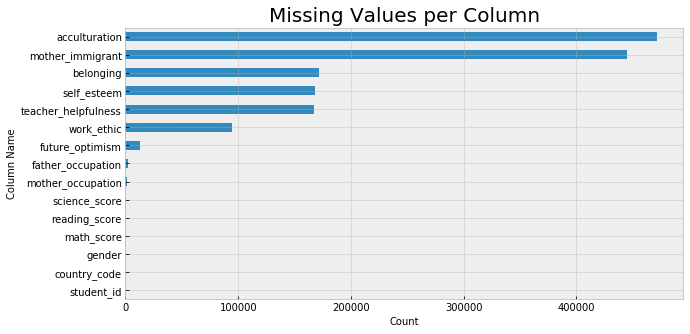

In [308]:
#create plot
plt.figure(figsize = [10, 5])
plt.title('Missing Values per Column', size = 20)
na_counts = df.isna().sum().sort_values(ascending = True)

na_counts.plot.barh(x = na_counts.values, y = na_counts.index);
plt.xlabel('Count', size = 10)
plt.ylabel('Column Name', size = 10)
plt.savefig(PATH_UNIVARIATE + 'missing-total.png')

**Observation 1:** As we have established above and in the data wrangling phase, all column variables from `science_score` onward have no missing data. This means we do not have to worry about the reliability of these columns and/or whether they represent all students.

**Observation 2:** columns with the most amount of missing data are `acculturation` and `mother_immigrant`. Unfortunately, while immigration is one of the key background factors I'm investigating, it is also the most unreliable. We must be ***extra*** wary when handling these variables, as there is no further evidence to suggest that these columns are truly representative of all students who took the survey. Therefore, to **interpret the results correctly,** we must say "According to all students who filled out the 'acculturation' and 'mother immigrant' questions . . . "

**Observation 3:** There is a large gap in missing data counts among the first 2 columns, then the next three columns, then `work_ethic`, and finally all other columns. There are **spikes** in the counts of missing data. It's worth noting that **these column groups are all similar in nature.** Belonging, self-esteem, and teacher_helpfulness are arguably variables with similar characteristics, so they would be grouped together in the same between "spikes." Acculturation and mother_immigrant, especially, are directly related to culture and immigration.  

## COUNTRY

In [289]:
#create function to generate horizontal bar chart showing percentages
def generate_pct_bar(df, cat_var, color):
    cat_counts = df[cat_var].value_counts()
    ax = sb.countplot(data = df, y = cat_var, order = cat_counts.index, palette = color)
    
    n_points = df.shape[0]
    locs, labels = plt.yticks()
    
    for p in ax.patches:
        percentage = '{:0.1f}%'.format(100 * p.get_width()/n_points)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), size = 20)

In [385]:
#create function for quick plot polishing
def polish_plot(suptitle, title, xlabel, ylabel, path, save_name):
    plt.suptitle(suptitle, y = 1.05)
    plt.title(title)
    plt.xlabel(xlabel, size = 15)
    plt.ylabel(ylabel, size = 15)
    plt.savefig(path + save_name)

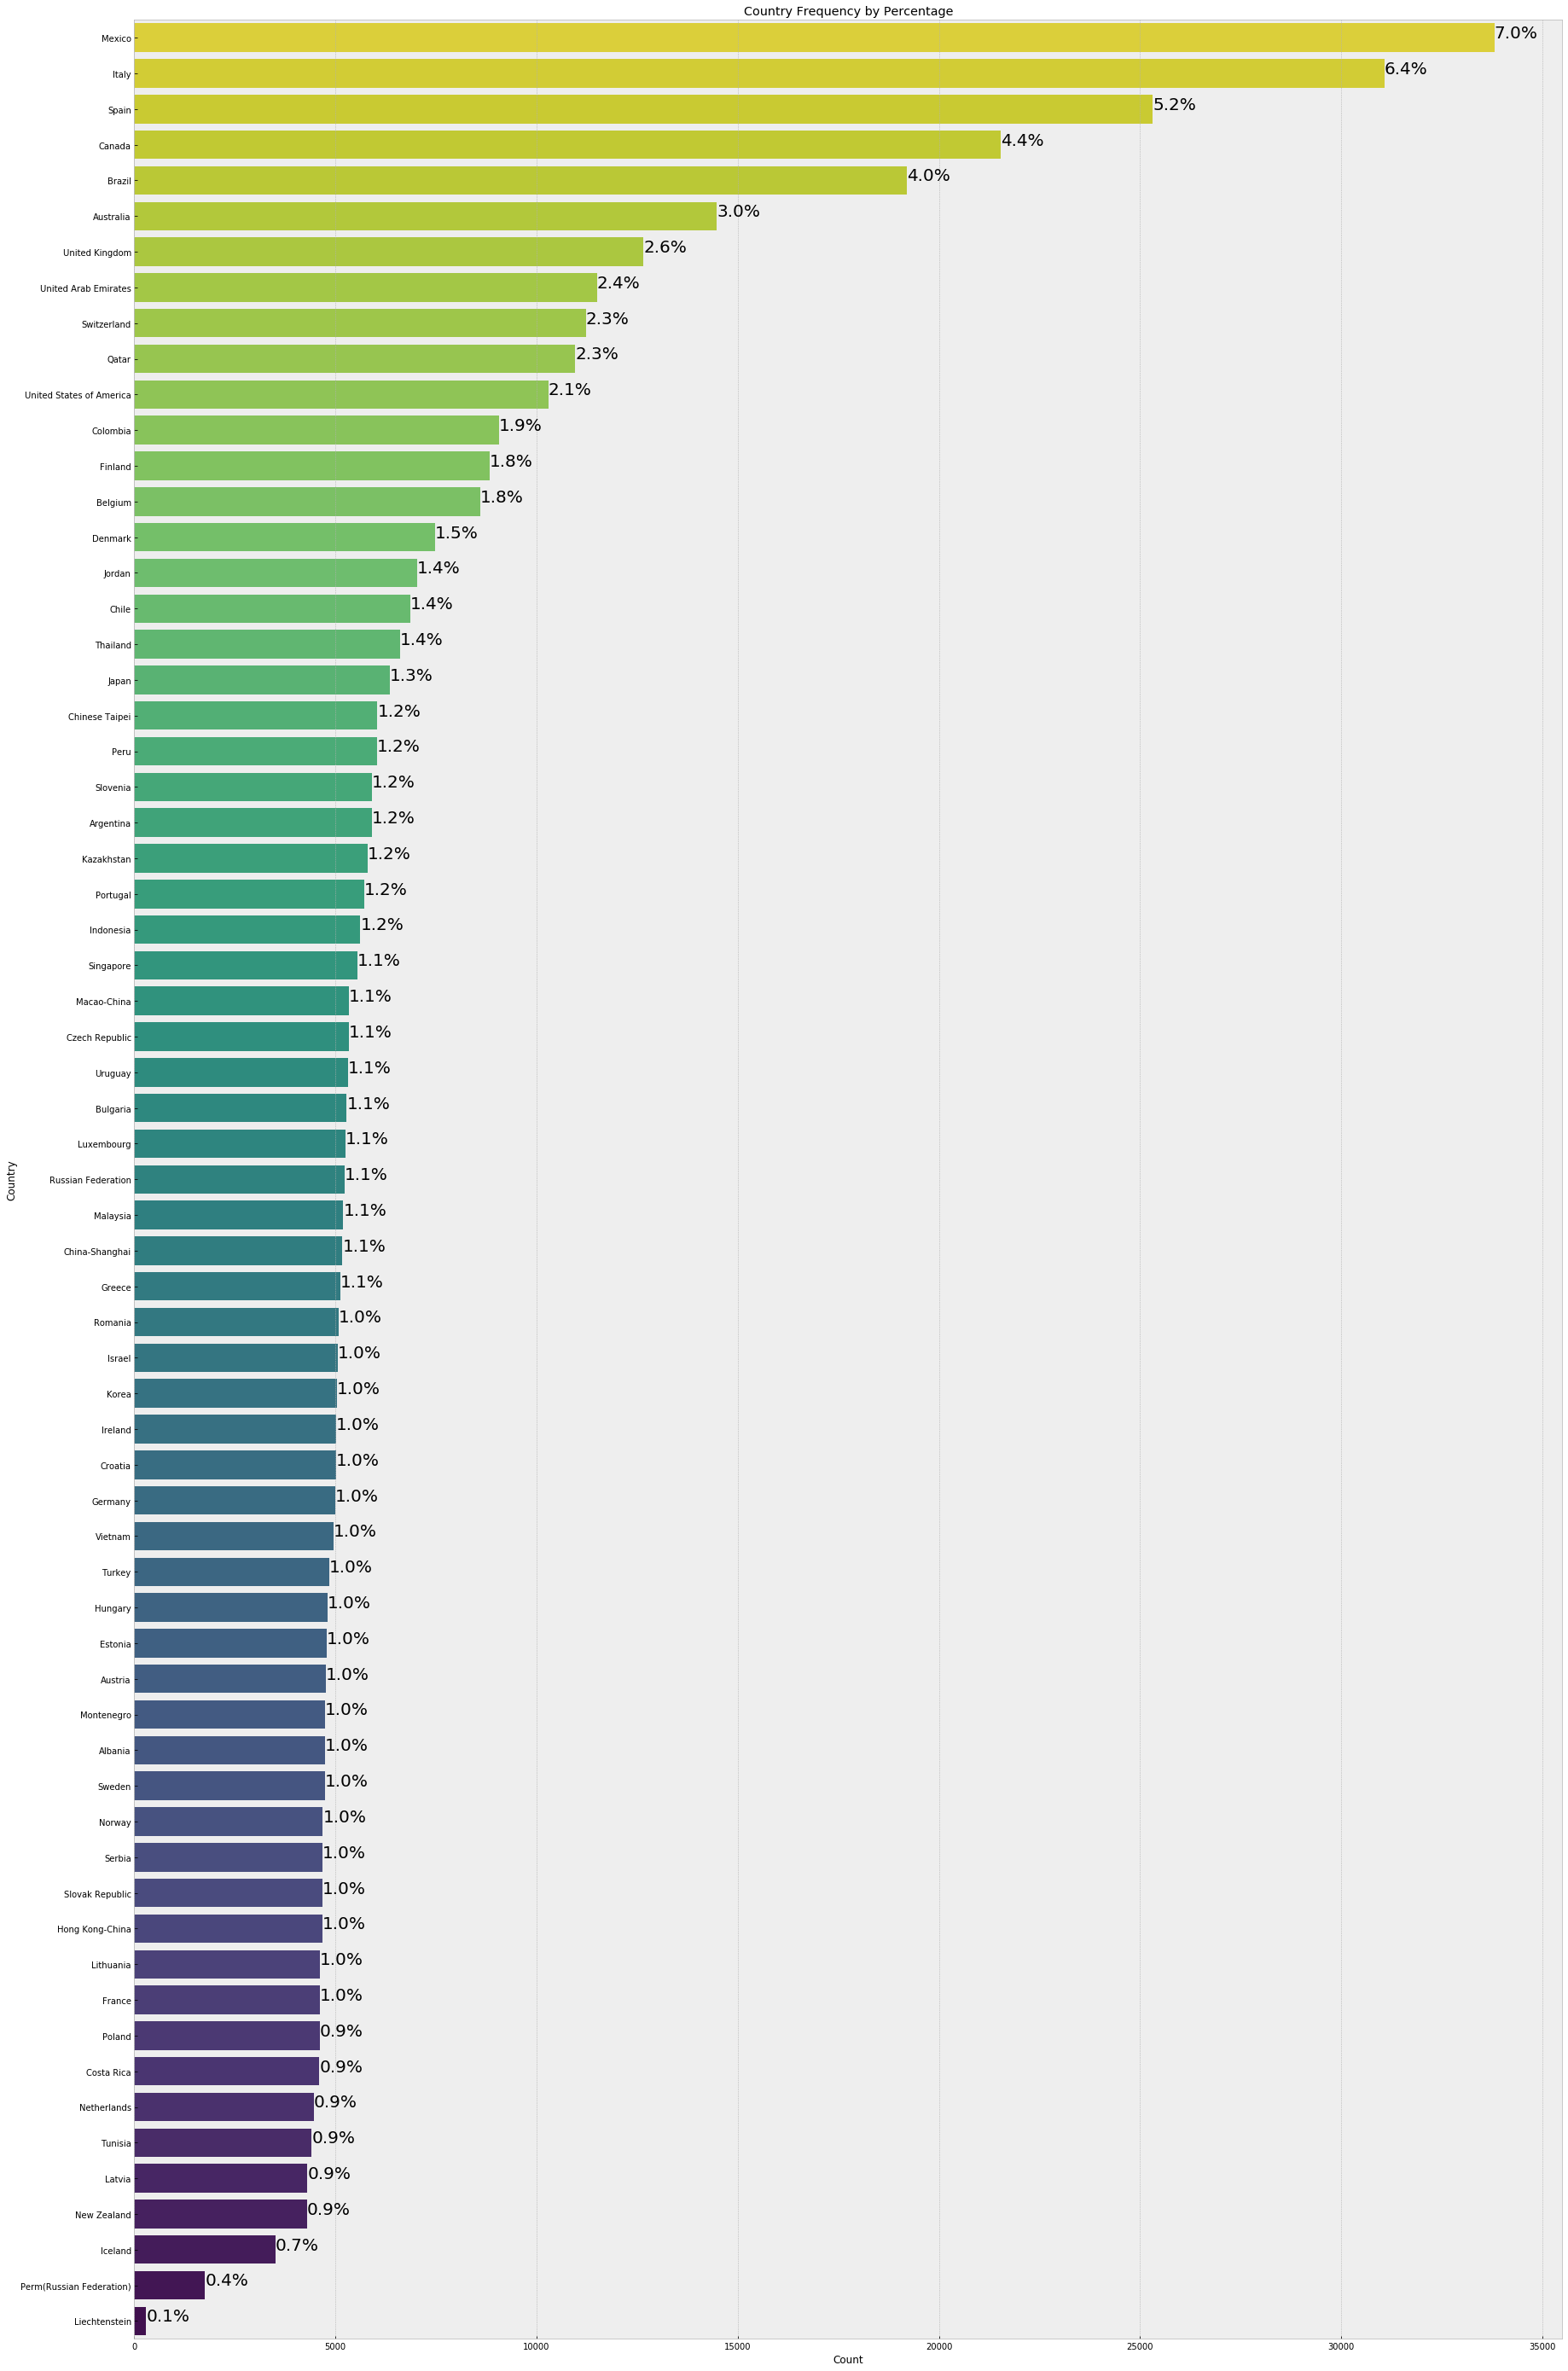

In [321]:
plt.figure(figsize=[30, 50])
generate_pct_bar(df, 'country_code', 'viridis_r')
polish_plot(None, 'Country Frequency by Percentage', 'Count', 'Country', PATH_UNIVARIATE, 'country.png')

**Observation 1:** The top 5 most frequent countries are Mexico, Italy, Spain, Canada, and Brazil.

**Observation 2:** The bottom 5 most frequent countries are Liechtenstein, Perm, Iceland, New Zealand, and Latvia.


## GENDER

In [322]:
#adjust plot layout so x and y labels will show when saving
from matplotlib import rcParams
rcParams.update({'figure.autolayout' : True})

In [323]:
import warnings
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, '
             'so results might be incorrect.')
)

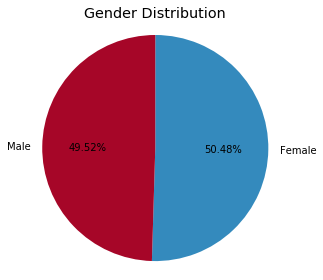

In [324]:
#create pie chart
gender_counts = df.gender.value_counts()
plt.pie(gender_counts, labels = gender_counts.index, startangle = 90, counterclock = False, autopct='%1.2f%%');
plt.axis('square');
plt.title('Gender Distribution')

plt.savefig(PATH_UNIVARIATE + 'gender-count.png');

In [325]:
df.groupby('gender').size()/df.shape[0]

gender
Female    0.504777
Male      0.495223
dtype: float64

**Gender is about evenly split with female students at 50.5% and males at 49.5%, so we can assume that comparisons by gender are fair and representative.**

### SCORES

**Math Score**


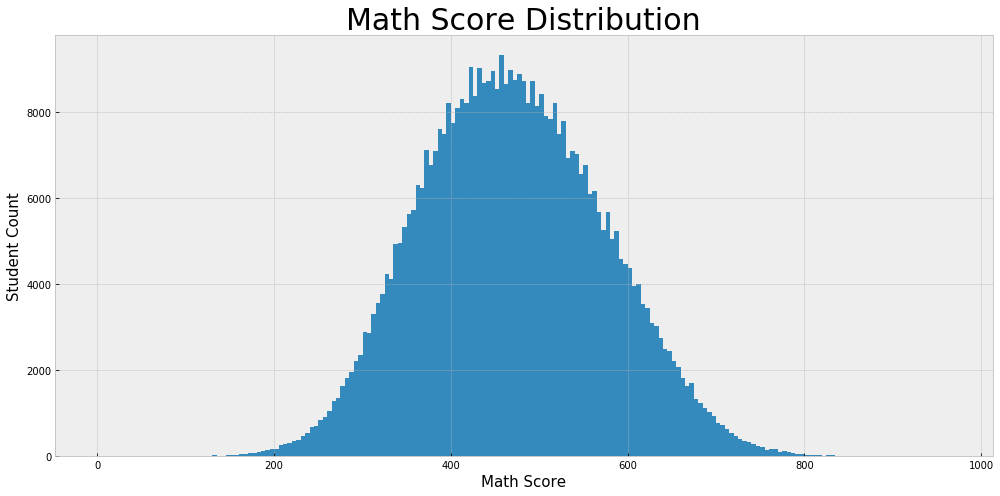

In [326]:
math_bins = np.arange(0, df['math_score'].max() + 5, 5)
plt.figure(figsize = [14, 7])

plt.hist(data = df, x = 'math_score', bins = math_bins);
plt.title('Math Score Distribution', size = 30)
plt.xlabel('Math Score', size = 15)
plt.ylabel('Student Count', size = 15);

plt.savefig(PATH_UNIVARIATE + 'hist-math.png');

**Reading Score**

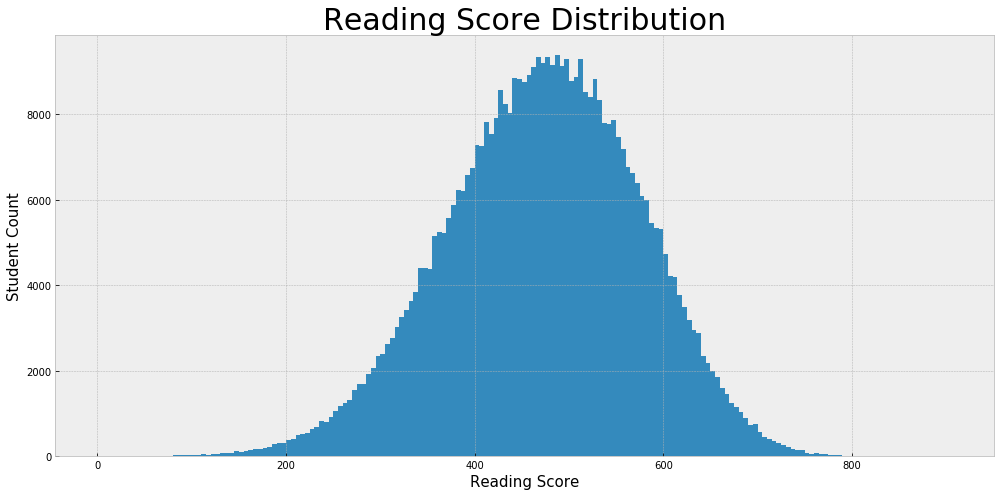

In [327]:
reading_bins = np.arange(0, df.reading_score.max() + 5, 5)
plt.figure(figsize = [14, 7])

plt.hist(data = df, x = 'reading_score', bins = reading_bins);
plt.title('Reading Score Distribution', size = 30)
plt.xlabel('Reading Score', size = 15)
plt.ylabel('Student Count', size = 15)

plt.savefig(PATH_UNIVARIATE + 'hist-reading.png')

**Science Score**

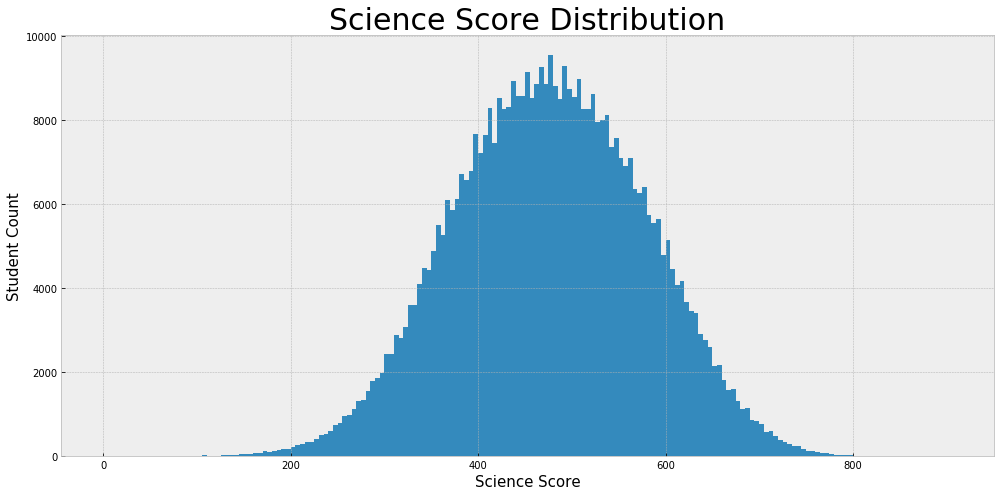

In [328]:
science_bins = np.arange(0, df.reading_score.max() + 5, 5)
plt.figure(figsize = [14,7])

plt.hist(data = df, x = 'science_score', bins = science_bins)
plt.title('Science Score Distribution', size = 30)
plt.xlabel('Science Score', size = 15)
plt.ylabel('Student Count', size = 15)

plt.savefig(PATH_UNIVARIATE + 'hist-science.png');

**Observation 1:** All math, reading, and science scores show a general normal distribution. However, math scores are *slightly* right-skewed while reading scores are *slightly* left-skewed, which means that on average, students tended to do *slightly* better on reading tests than math tests. Intuitively speaking, this makes sense. As for science score distribution, it is the most symmetric graph out of the three scores.

**Observation 2:** The peaks for math, reading, and science scores are approximately between 400 and 450, around 450, and around 500, respectively. For future reference, we can compare their means medians to see if these approximations are more or less correct.


### PARENT OCCUPATIONS

> Since there were too many occupations to coherently fit in one visual, I focused only on the *top 50 most frequent occupations* for both mother and father.

**Mother Occupation**

In [330]:
#isolate DataFrame to contain entries with only top 50 mother occupations
m_occupation_order = df.mother_occupation.value_counts().drop('Missing')[:50].index
m_occupation_lim = df.loc[df.mother_occupation.isin(m_occupation_order)]

#check for only 50 unique values
m_occupation_lim.mother_occupation.nunique()

50

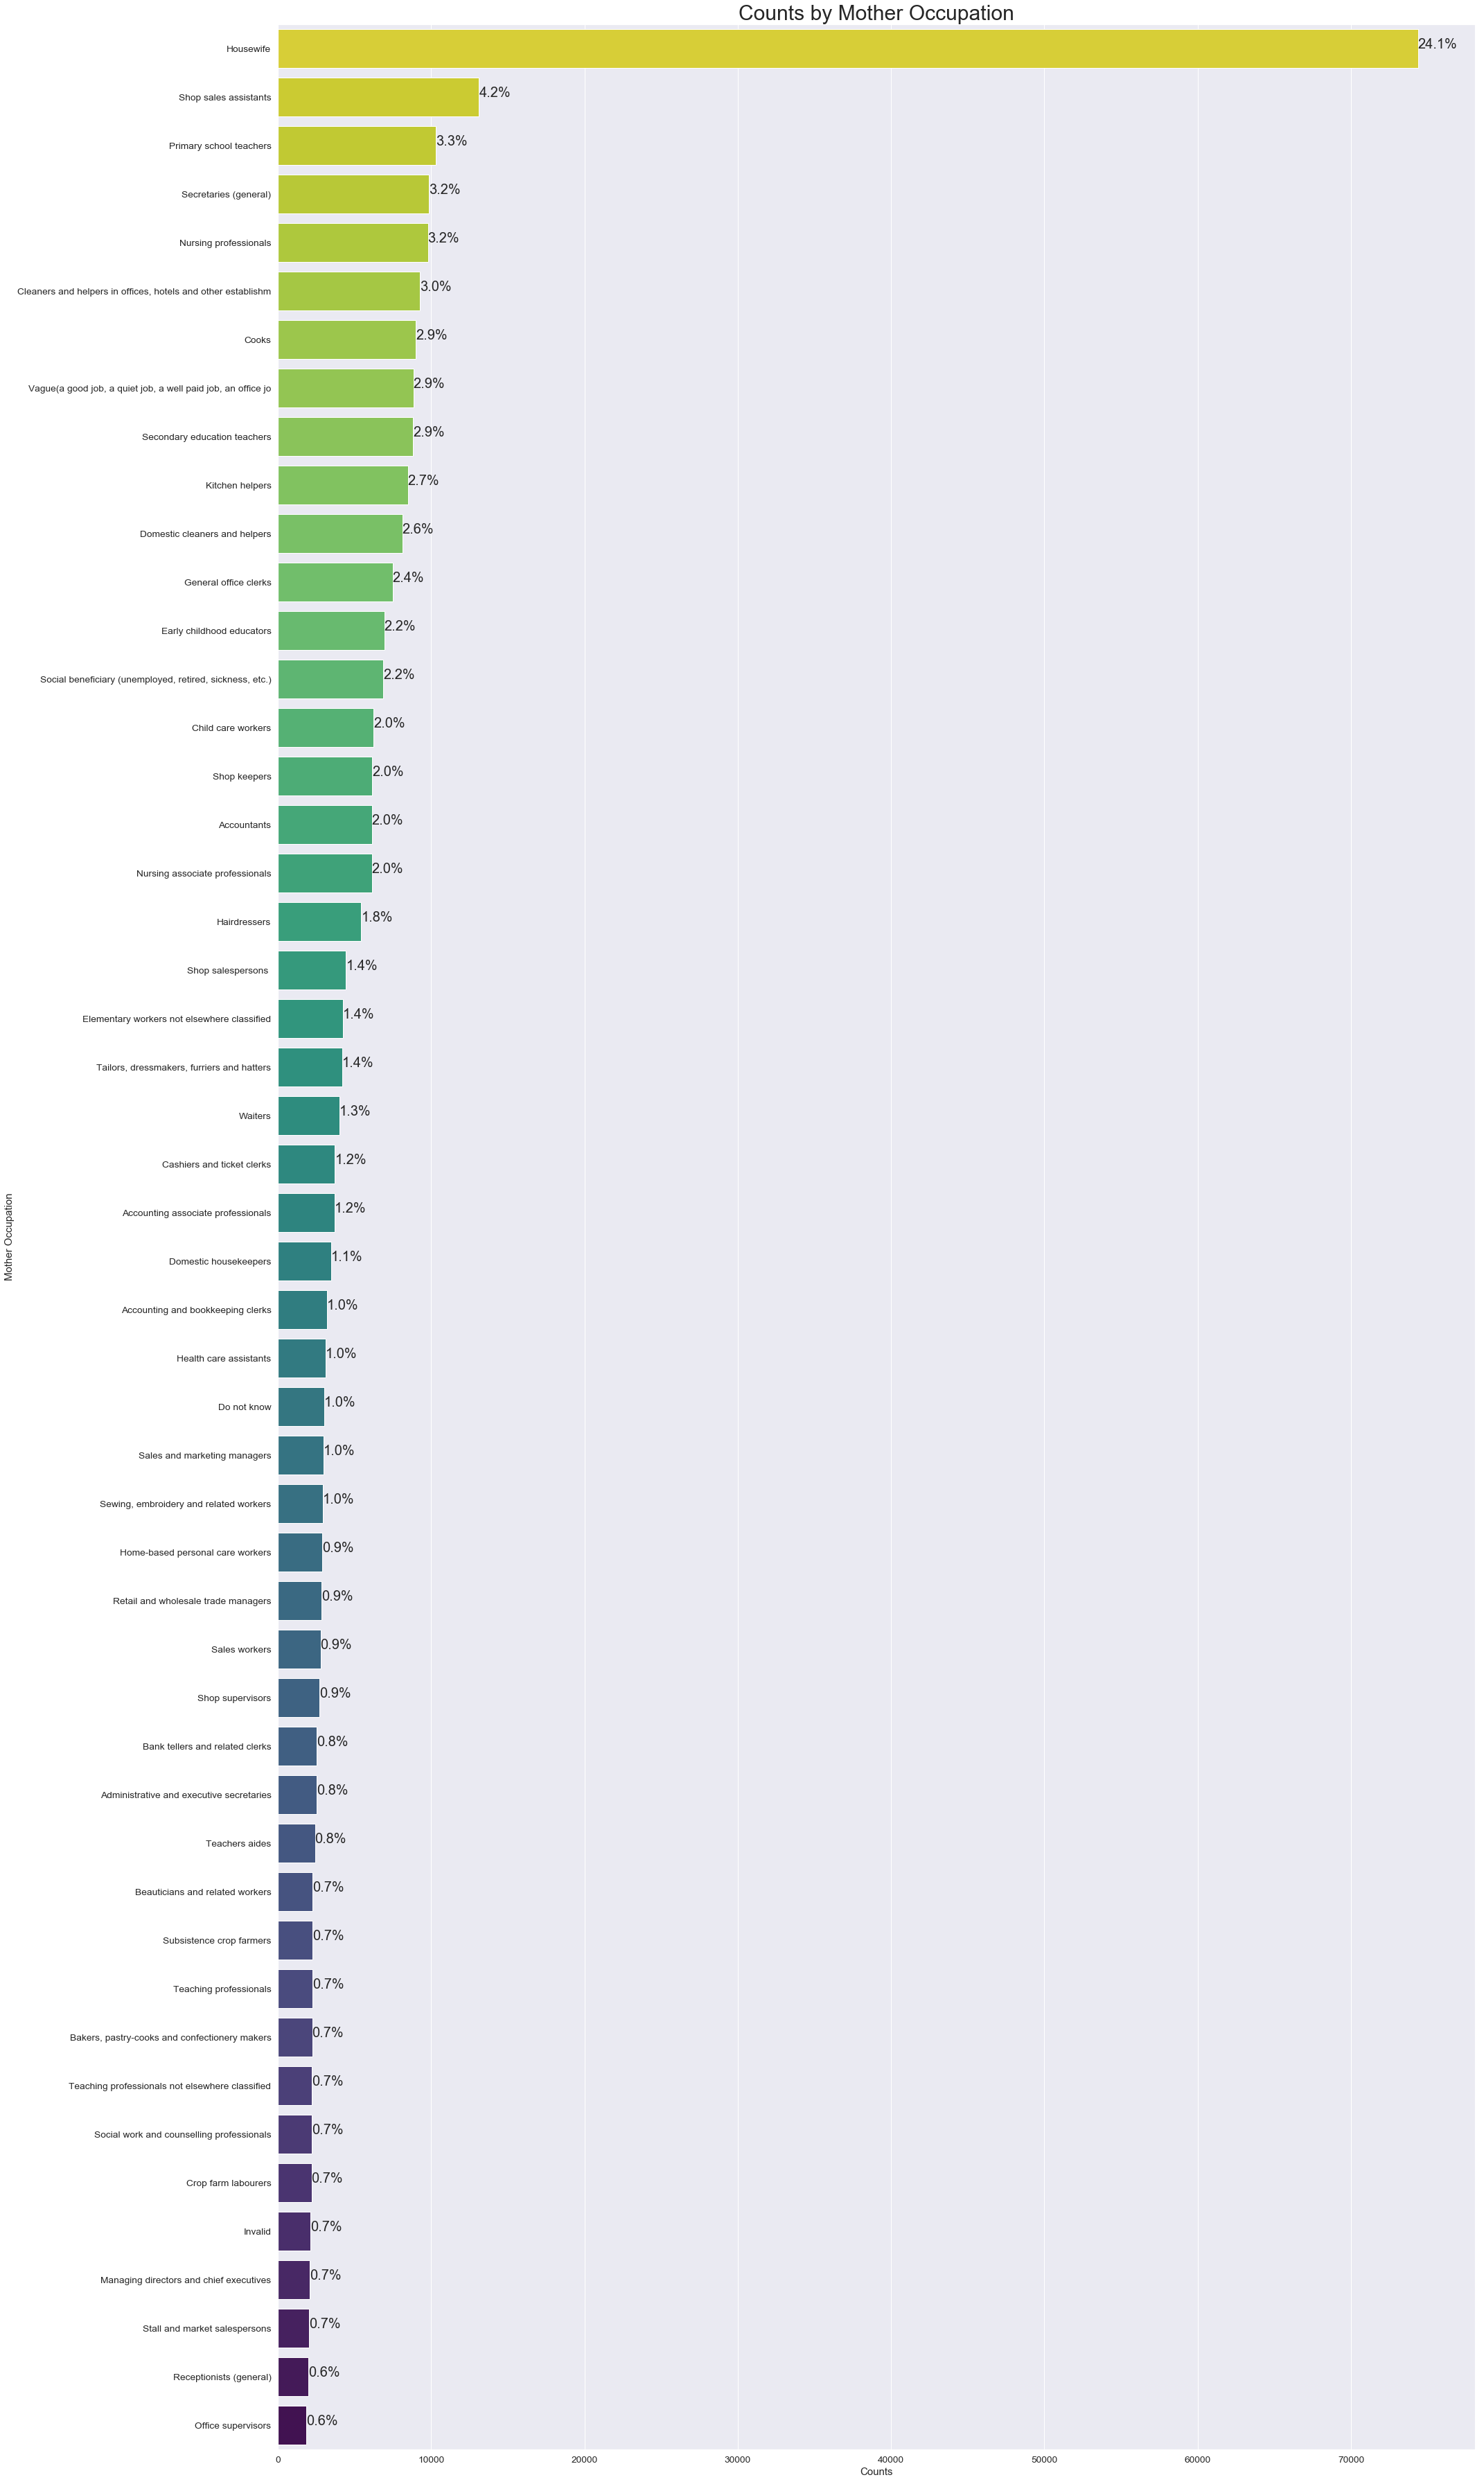

In [364]:
#generate mother occupation bar
plt.figure(figsize = [30, 50])
generate_pct_bar(m_occupation_lim, 'mother_occupation', 'viridis_r')

#polish
# sb.set(font_scale = 2)
plt.title('Counts by Mother Occupation', size = 30)
plt.ylabel('Mother Occupation')
plt.xlabel('Counts');

plt.savefig(PATH_UNIVARIATE + 'mother-occupation.png');

**Housewife is the most frequent occupation for a student's mother, at a disproportionate rate compared to the 2nd most frequent occupation: Shop sales assistant. The difference in proportions is 19.9%, with 24.1% for *Housewife* and *Shop sales assistant*. When considering that there are 50 occupations included, this is a significant proportion.**

**Note**: For all of the mother and father occupation counts, I will have dropped "Missing" from the records. This is because 1. "Missing" is not a legitimate value, and 2. it adds to the overall count, obscuring the accuracy of our visualizations.

**Father Occupation**

In [332]:
#isolate DataFrame to contain entries with only top 50 father occupations
f_occupation_order = df.father_occupation.value_counts().drop('Missing')[:50].index
f_occupation_lim = df.loc[df.father_occupation.isin(f_occupation_order)]

#check for only 50 unique values
f_occupation_lim.father_occupation.nunique()

50

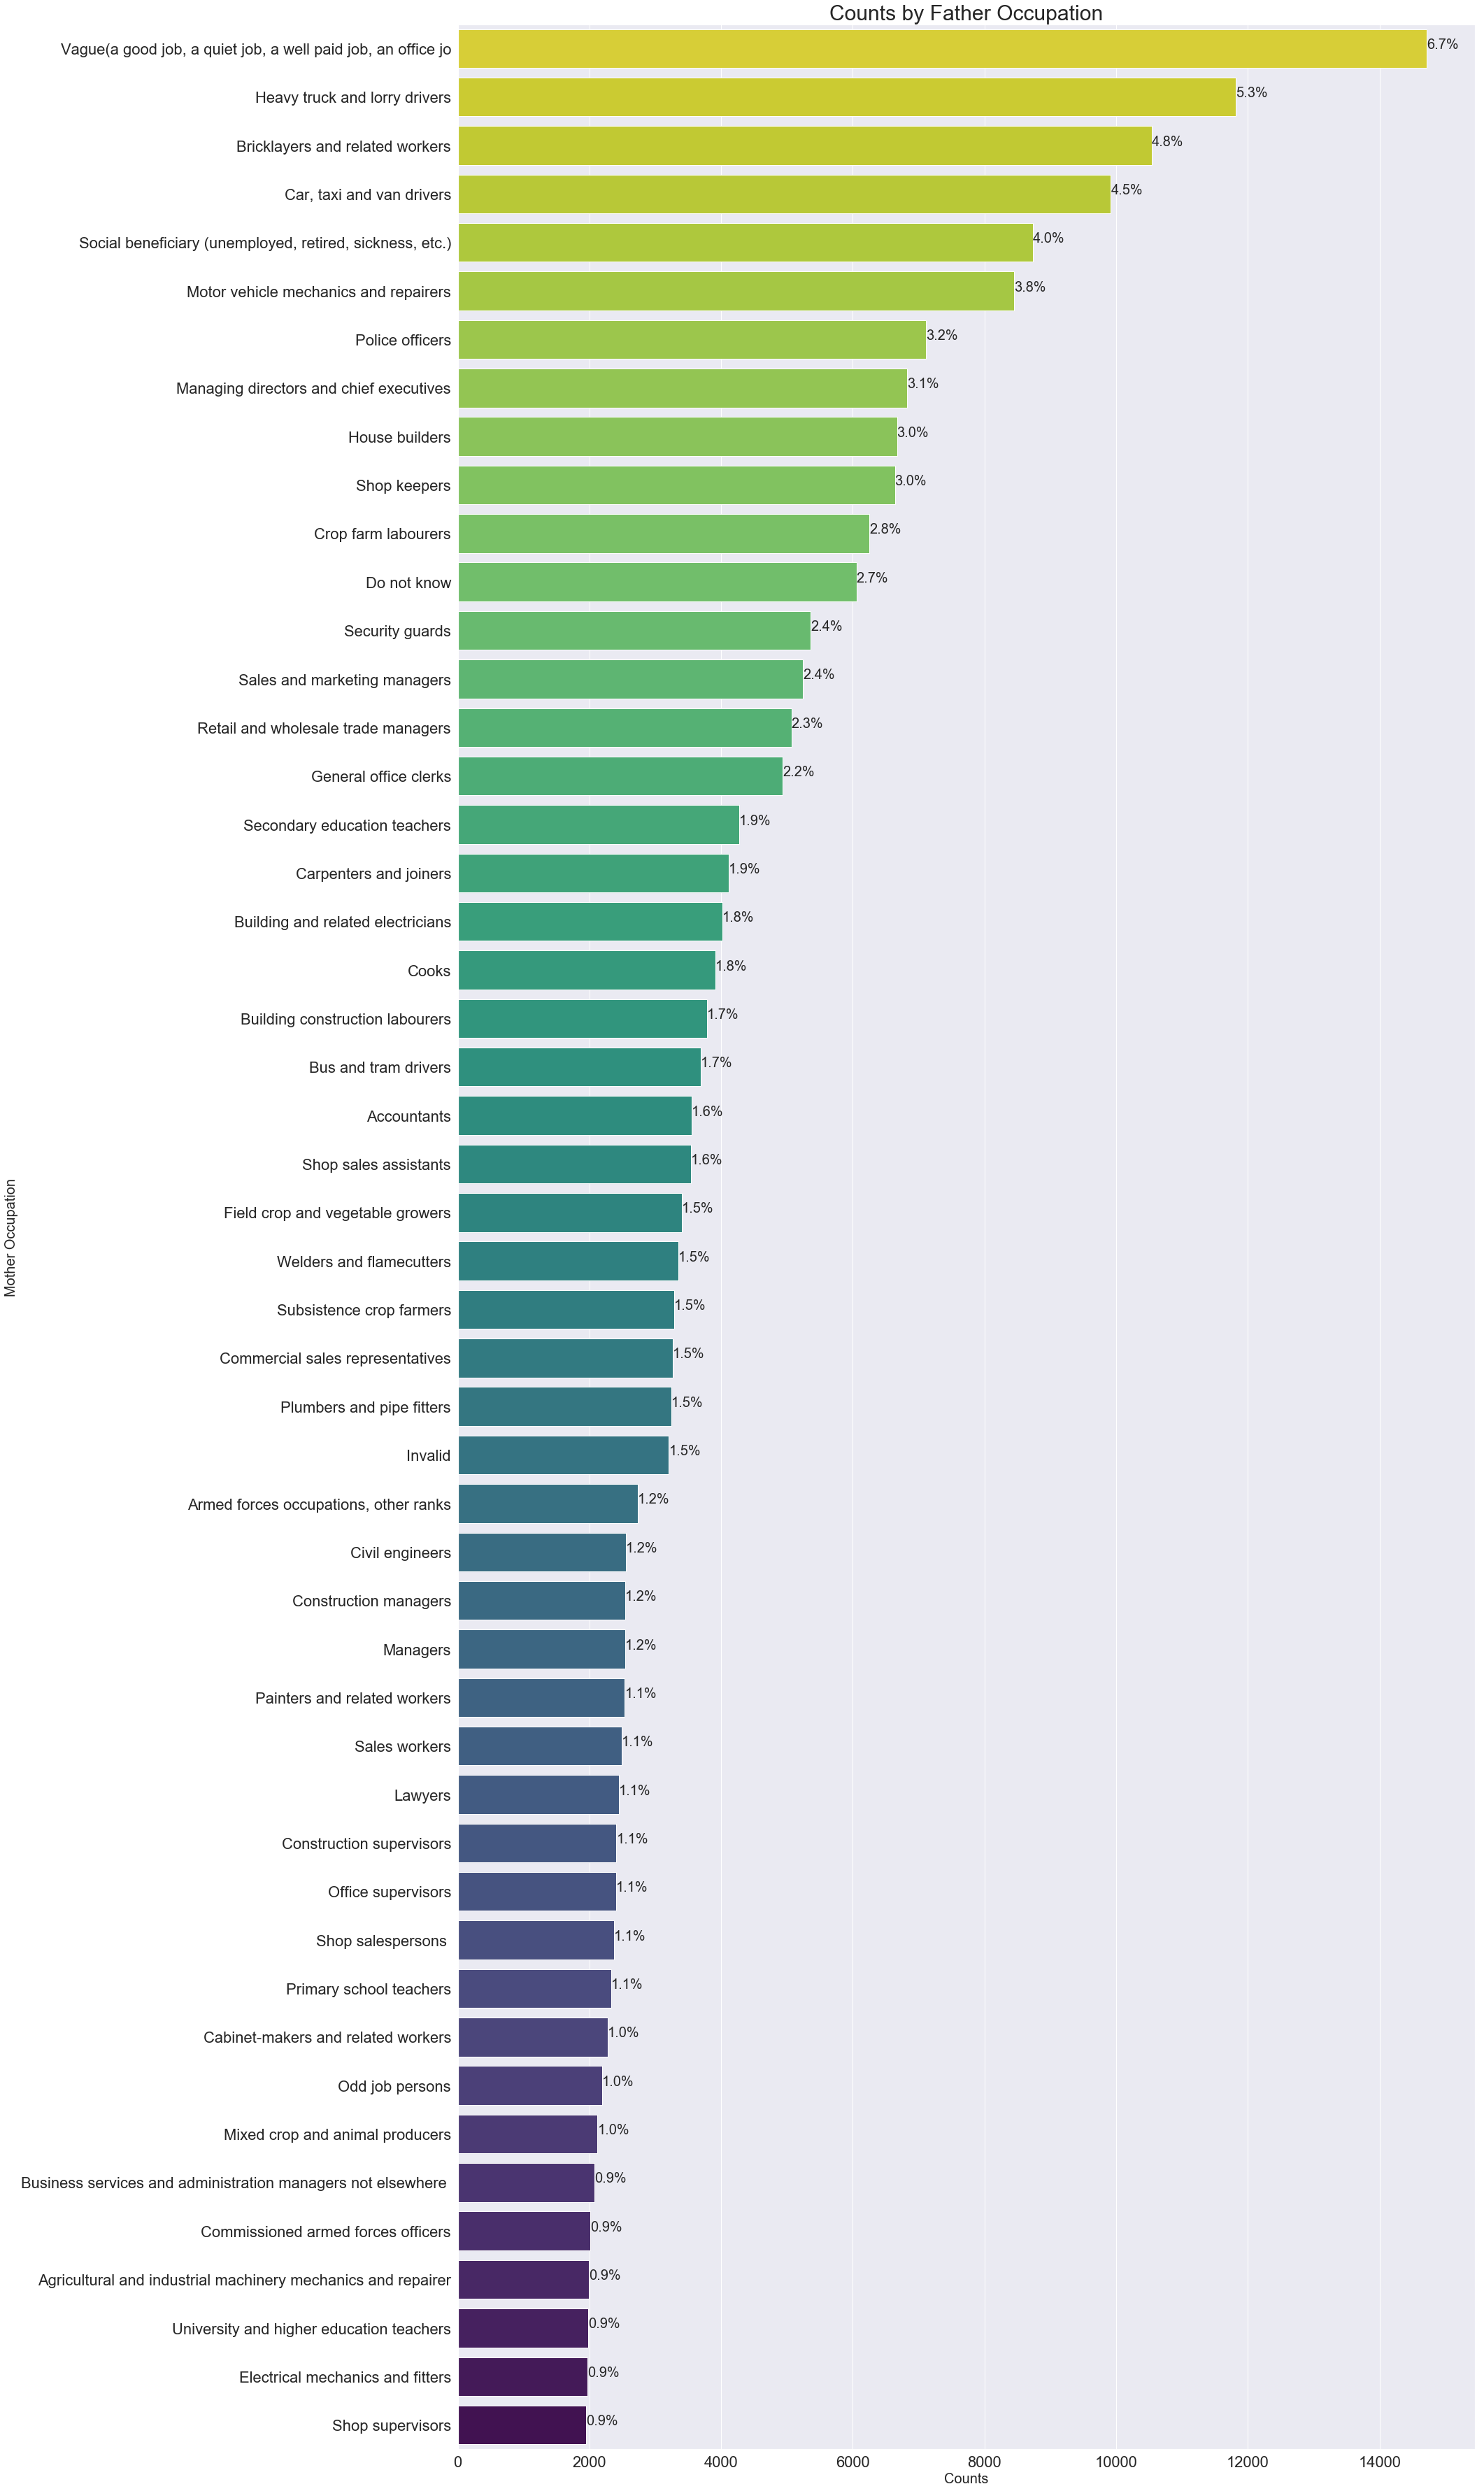

In [337]:
#create bar chart showing percentages
plt.figure(figsize = [30, 50]);
generate_pct_bar(f_occupation_lim, 'father_occupation', 'viridis_r')

#polish
plt.title('Counts by Father Occupation', size = 30)
plt.ylabel('Mother Occupation', size = 20)
plt.xlabel('Counts', size = 20);
plt.savefig(PATH_UNIVARIATE + 'father-occupation.png');

**The most common recorded job for a father is "Vague". Right after that is Heavy truck and lorry drivers. The difference in these frequency proportions is only 1.4%, which is not very significant in comparison to the disparity between the top 2 occupations for mothers.**

**Observation 1:** The gender gap in parent occupations is ***very*** clear. Mothers tend to hold occupations more related to public service, secretaries, caretaking, and domestic help, with the exception of managing directors and chief executives. On the other hand, fathers, tend to hold occupations more directly related to harder labor and businesses. However, the disparity of these jobs does not indicate whether or not the average student's mother or father has a higher salary.

**Observation 2:** Another big disparity is the number of max counts among both top 50 mother and father occupations. The maximum number of counts for mother occupation is over 70,000, while the max count is just a little over 14,000 for father occupation. I predict that the split in total counts between the top 50 parent occupations is ***not even***, therefore we may not be able to make any reliable comparisons between mother and father occupation. However, we know we ***can*** make separate comparisons of mother and father occupation with other variables in future bivariate and multivariate exploration.

> But just to make sure, let's plot the **total counts** of top 50 parent occupation in a pie chart instead of relying only on the most frequent counts.

TK turn these into a donut plot

In [293]:
#depict parent occupation counts in a pie chart
prnt_dict = {'Father has Occupation' : f_occupation_lim.shape[0],
            'Mother has Occupation' : m_occupation_lim.shape[0]
            }

series = pd.Series(prnt_dict)

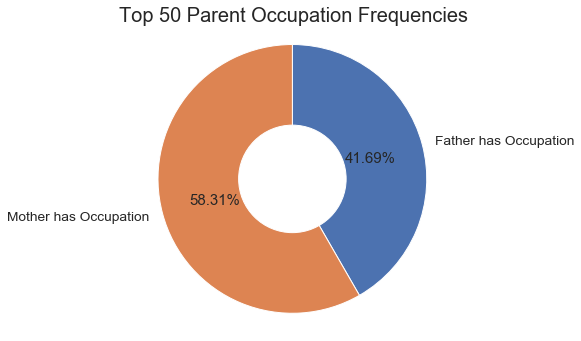

In [384]:
sb.set(font_scale = 1.25)
plt.figure(figsize = [10, 5])
plt.pie(series, startangle = 90, labels = series.index, counterclock = False, autopct='%1.2f%%');
plt.axis('square');
plt.title('Top 50 Parent Occupation Frequencies', size = 20)

#draw circle
center_circle = plt.Circle((0, 0), 0.40, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.savefig(PATH_UNIVARIATE + 'prnt-occupation-frequencies');

**Even when taking *total counts* into question, there is still a large uneven split between the number of records for mother and father occupation. Therefore, my prediction was correct: we cannot make any reliable comparisons between these two variables in future bivariate and multivariate exploration.**

### If Mother Is An Immigrant

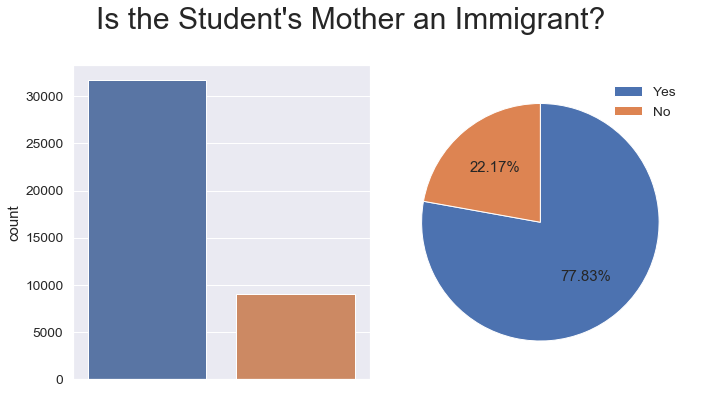

In [411]:
plt.figure(figsize = [10, 5])
plt.suptitle('Is the Student\'s Mother an Immigrant?', y = 1.1, size = 30)
plt.subplot(1, 2, 1)
sb.countplot(data = df, x = 'mother_immigrant', order = df.mother_immigrant.value_counts().index);
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)

plt.subplot(1, 2, 2)
plt.pie(df.mother_immigrant.value_counts(), startangle = 90, counterclock = False, autopct='%1.2f%%');

plt.legend(df.mother_immigrant.value_counts().index, loc = 'upper right')

plt.subplots_adjust(right = 0.85)
plt.savefig(PATH_UNIVARIATE + 'mother-immigrant.png')

**Observation 1**: It appears that out of the approximately 40,000 students who answered this question, the of overwhelming majority students have immigrant mothers at 77.83%. This will be an interesting variable to examine alongside *acculturation*: ***how does coming from an immigrant family background affect one's ability to adapt to their host culture?***

## Environment Factors

> There are 3 variables for environment factors: `teacher_helpfulness`, `belonging`, and `acculturation.` First I will examine them individually, and then provide an overall summary at the end.

**For the ratings, I will set the bar as this: any score greater than 5 is favorable, less than is unfavorable, while 5 is neutral.**

In [397]:
def create_distplot(data, bins):
    fig = plt.figure(figsize = [12, 6])
    ax = sb.distplot(data, bins = bins)
    ax.minorticks_on()
    return fig, ax

### Teacher Helpfulness

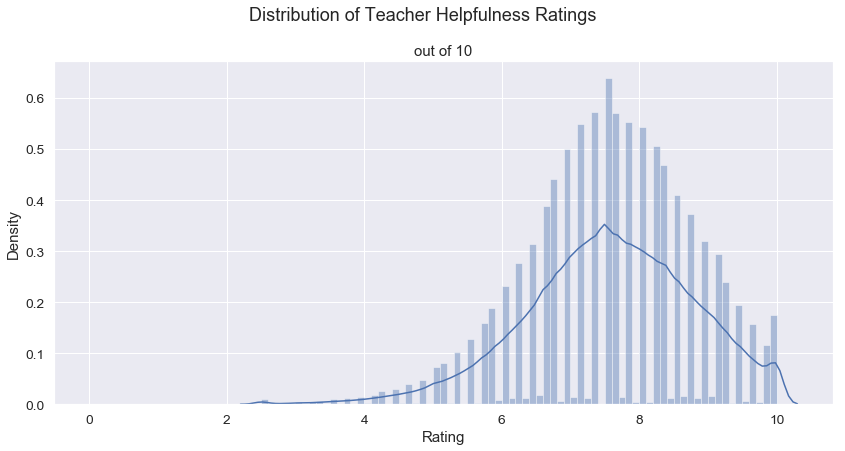

In [399]:
fig, ax = create_distplot(df.teacher_helpfulness.dropna(), bins = bins_scores)
polish_plot('Distribution of Teacher Helpfulness Ratings', 'out of 10', 'Rating', 'Density',
            PATH_UNIVARIATE, 'teacher-helpfulness.png')

**Observation:** As shown with the kernel density curve, the distribution of `teacher_helpfulness` scores is right skewed. This means that ***more students, on average, found their teachers to be more helpful than not***: with a peak of approximately 7.5.

In [163]:
subplot_fields = {1 : [4.8, 5.5, 'Outlier around 5'],
                 2: [6.6, 6.8, 'Outlier between 6 and 7'],
                 3: [7.5, 8.5, 'Outlier between 8 and 8.5'],
                 4: [9.8, 10, 'Outlier between 8.5 and 10']}

def create_outlier_plots():
   
    bins = np.arange(0, df.belonging.max() + .05, .05)
    for i in range(1, 5):
        plt.subplot(1, 4, i)
        sb.distplot(df.teacher_helpfulness.dropna(), bins = bins)
        dict_val = subplot_fields[i]
        print(dict_val)
        plt.xlim(dict_val[0], dict_val[1])
        plt.title(dict_val[2])

### Belonging

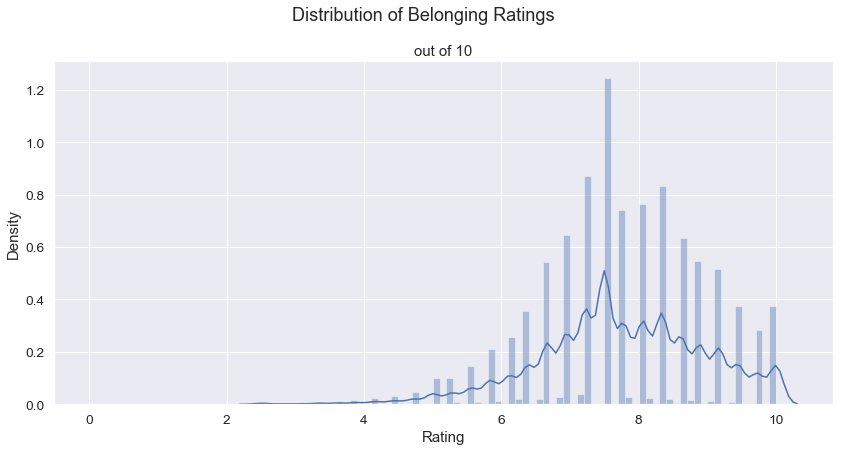

In [387]:
create_distplot(df.belonging.dropna(), bins = bins_scores)
polish_plot('Distribution of Belonging Ratings', 'out of 10', 'Rating', 'Density',
            PATH_UNIVARIATE, 'belonging.png')

**Observation 1:** As shown with the kernel density curve, the distribution of `belonging` scores is severely left-skewed. This means that ***more students, on average, felt like they belong and fit in socially to their school***: with a peak of approximately 7.5. 

**Observation 2:** Both the `teacher_helpfulness` and `belonging` distributions show peaks at around the same rating at 7.5

### Acculturation

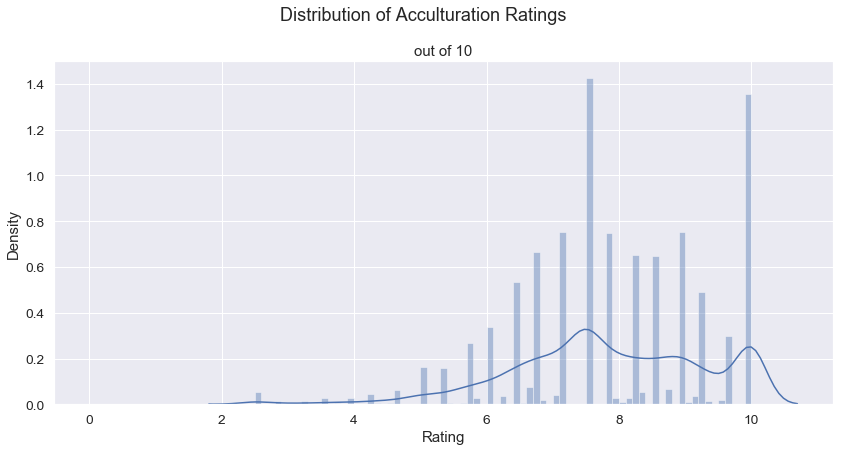

In [406]:
fig, ax = create_distplot(df.acculturation.dropna(), bins = bins_scores)
plt.minorticks_on()
polish_plot('Distribution of Acculturation Ratings', 'out of 10', 'Rating', 'Density',
            PATH_UNIVARIATE, 'acculturation.png')

**Observation:** Both the kernel density curve and the histogram show a bimodal distribution, both with peaks greater than 5. These peaks are found at approximately 7.5 and 10: the 2 most frequently occurring scores for the average student at any given time. These interpretations suggest that ***on average, for all students who answered the acclimation questions, there is no bias against the unfavorable side below 5,*** indicating that the students who answered felt well-adapted to the host culture.

## Student Drive

### Work Ethic

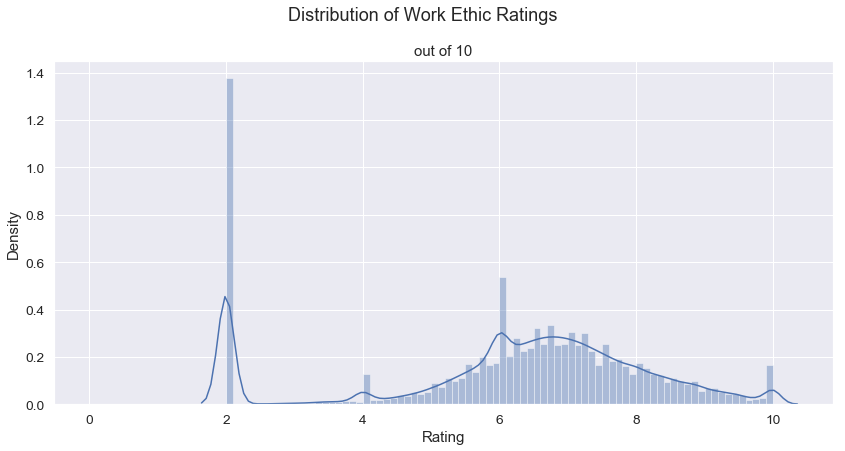

In [389]:
create_distplot(df.work_ethic.dropna(), bins = bins_scores)
polish_plot('Distribution of Work Ethic Ratings', 'out of 10', 'Rating', 'Density',
            PATH_UNIVARIATE, 'work-ethic.png')

**Observation 1:** There are 4 outliers: scores at **2**, **4**, **6**, and **10**. The peaks in decreasing order are the following: *2*, *6*, *10*, and *4*.

**Observation 2:** When taking outliers into account, the distribution appears to be multi-modal. However, when ignoring outliers, the `work_ethic` score distribution is bi-modal just like the `acculturation` score distribution.

**Observation 3:** While ignoring all other outliers and assuming that Rating = 2 is part of the distribution, there are 2 peaks: at **2** and **6**. However, the density of students who rated 2 for work ethic-related questions far outnumbers that of the other peak: at a comparison of approximated density 1.4 to 0.35. ***This means that the overwhelming majority of students who answered work-ethic questions do not feel optimistic about their work effort.***

 

> Let's "zoom in" on the distribution now, without accounting for the outlier at Rating = 2.

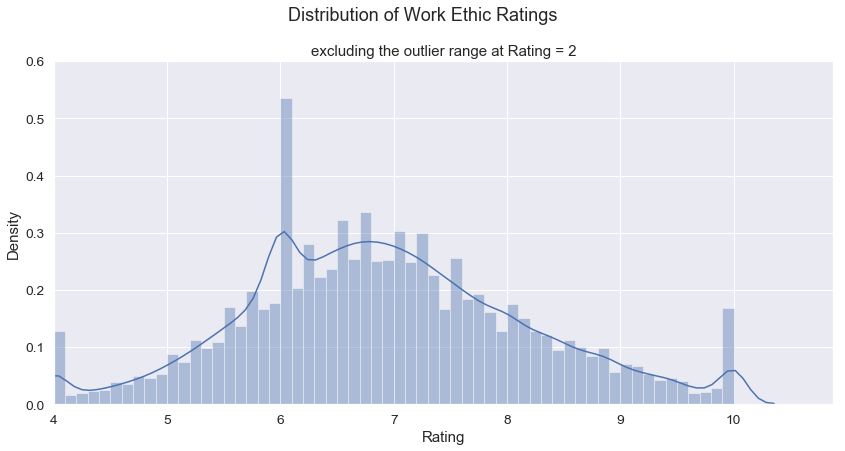

In [391]:
fig, ax = create_distplot(df.work_ethic.dropna(), bins = bins_scores)
ax.set(xlim = (4), ylim = (0, 0.6))
polish_plot('Distribution of Work Ethic Ratings', 'excluding the outlier range at Rating = 2', 'Rating', 'Density',
            PATH_UNIVARIATE, 'work-ethic-normal.png')

**Observation:** When ignoring the outliers from the 1st peak to the 2nd peak, the distribution for Work Ethic appears to be ***normally distributed.** Albeit there is yet another peak at Rating = 6. 

> So far, ***Work Ethic is the most irregular variable we have in terms of scoring distribution. It has 4 peaks with the highest one being an outlier.***
    - when including outliers, the distribution is multi-modal. 
    - When excluding outliers except for Rating = 2, the distribution is bimodal.
    - when excluding all outliers, the distribution is normal.

### Future Optimism

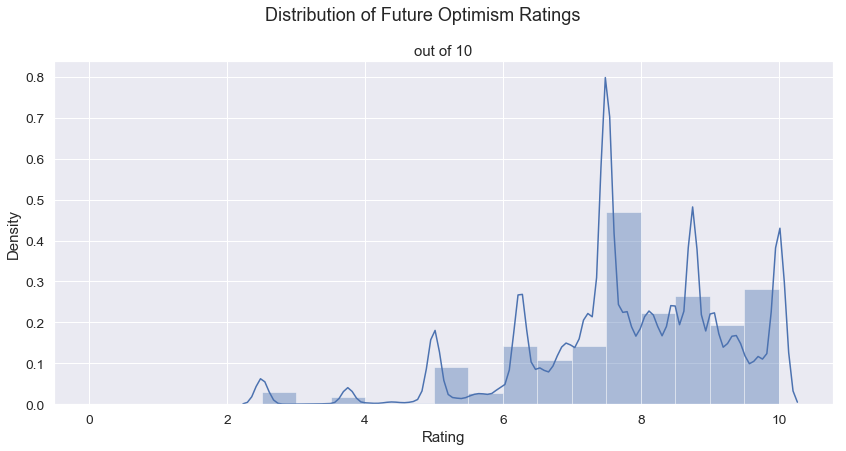

In [392]:
bins_adjust = np.arange(0, df.future_optimism.max() + 0.5, 0.5)
create_distplot(df.future_optimism.dropna(), bins = bins_adjust)
polish_plot('Distribution of Future Optimism Ratings', 'out of 10', 'Rating', 'Density', 
            PATH_UNIVARIATE, 'future_optimism.png')
plt.xscale('linear')

**Observation 1:** Although the kernel density curve is the wonkiest out of all the score distribution graphs, the histogram depicts a somewhat left-skewed distribution, with a **peak of scores between 7.5 and 8.** This means that for all students who answered questions related to outlooks of their future, on average, they felt favorable that the school has helped them establish post-high school plans.

### Self Esteem

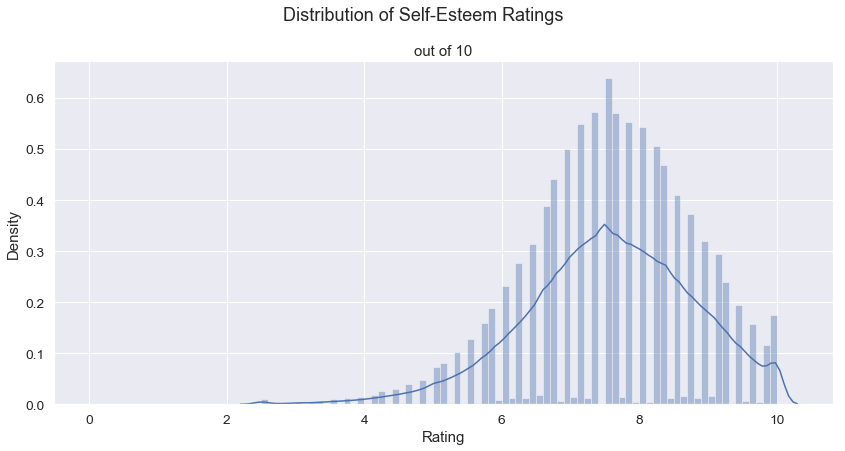

In [393]:
create_distplot(df.teacher_helpfulness.dropna(), bins = bins_scores)
polish_plot('Distribution of Self-Esteem Ratings', 'out of 10', 'Rating', 'Density',
            PATH_UNIVARIATE, 'self-esteem.png')

**Observation 1:** The kernel density curve for students who answered questions related to self-esteem depicts a peak in scores around **7.5**. This curve is much smoother with an actual distinctive skew *free of outliers* unlike the ones for Work Ethic , Future Optimism, and and Acculturation.

**Observation 2:** I find it surprising that the distributions of Teacher Helpfulness, Sense of Belonging, Acculturatation, Future Optimism, and Self-Esteem all have peaks in relatively the same ranges from **7.5 - 8.** ***To explore why, it will be useful to see which other variables influence the majority of students who answered these questions to score mostly in the 7.5 - 8 range.***

I theorize the following: ***Maybe most students are just reluctant at giving low and negative answers, so they tend to write down ratings higher than they normally would.*** At least, in my experience, that is the general tendency of many students.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

Questions brought from previous section:
- why do students in the TK columns score mostly, on average, between 7.5 and 8?
- 

- mother is immigrant vs. acculturation
> I predict that if a student has an immigrant mother, then they would less likely acclimate well to their host culture. This is because many first-generation immigrant children often do not have a solid headstart familiarity with the country they currently live in. However, I am also aware that a wide variety of third party factors could influence a student to acclimate better to their environment. For example: if they speak the host country's language at a native level, or if their heritage culture is similar or even almost identical to the current culture.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

- box plots between all 3 scores

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

# Resources
- https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
- 